In [1]:
import meshposition as mp
import utils as utl
import numpy as np
import matplotlib.pyplot as plt
import analyse_utils as atl
import math

mp.start()

uart> device with serial 000760129940 found at COM35
uart> COM35 : is Open


mp>serial thread started


databases available from https://www.homesmartmesh.com/docs/networks/ultrawideband/#database

In [2]:
node_ids = mp.rf_get_active_short_ids()
utl.save_json_timestamp("config",node_ids)

(Green) : (3)/(530BE91D3559D690)
(Tester) : (1)/(1CF6567337562176)
{'Green': {'sid': 3, 'uid': '530BE91D3559D690'}, 'Tester': {'sid': 1, 'uid': '1CF6567337562176'}}


'./test_db/config 2021.07.25 16-54-48.json'

In [3]:
diag = mp.uwb_ping_diag("Green","Tester")
print(diag)
fp = diag["firstPath"]
fp_float = math.trunc(fp/64) + ((fp%64)/64)
print(f"first path index = {fp_float}")

{'firstPath': 47840, 'fpAmp1': 4498, 'fpAmp2': 2974, 'fpAmp3': 2346, 'maxGrowthCIR': 1558, 'maxNoise': 1029, 'rxPreamCount': 119, 'stdNoise': 48}
first path index = 747.5


In [4]:
cir_data = mp.uwb_cir("Tester")
cir_complex = np.frombuffer(cir_data, dtype='i2').astype(np.float32).view(np.complex64)

max = 7057.2763671875


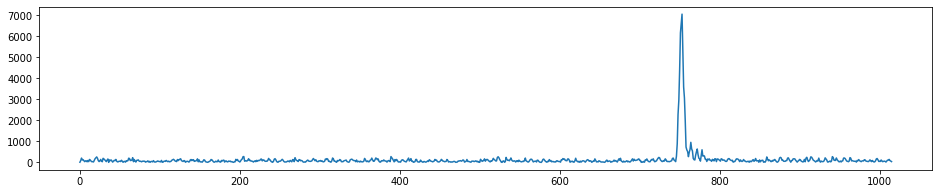

In [5]:
cir_norm = np.absolute(cir_complex)
print(f"max = {np.amax(cir_norm)}")
fig = plt.figure()
plt.plot(cir_norm)
fig.set_size_inches(16,3)

max = 7057.2763671875


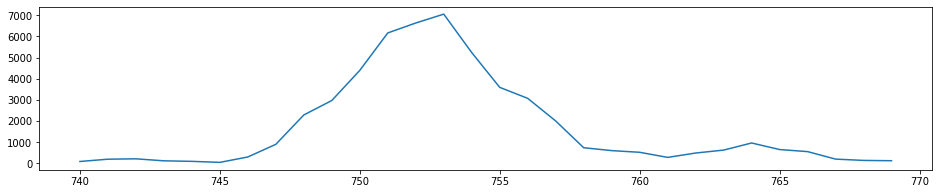

In [6]:
cir_norm = np.absolute(cir_complex)
print(f"max = {np.amax(cir_norm)}")
fig = plt.figure()
start_pulse = 740
end_pulse = 770
plt.plot(range(start_pulse,end_pulse),cir_norm[start_pulse:end_pulse])
fig.set_size_inches(16,3)

In [ ]:
mp.stop()